<a href="https://colab.research.google.com/github/alexandresoto/MVP_Sprint1.1/blob/main/MVP_dataset_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Análise de Dados e Boas Práticas

## Profs. Tatiana Escovedo e Hugo Villamizar

### Aluno: Alexandre Souza Torres


## 1. Definição do Problema

O dataset usado neste projeto será o **Informe Mensal Fii 2022**, proveniente originalmente do site da CVM - Comissão de Valores Mobiliários. O estudo dos fundos de investimento imobiliários (fiis) tem como objetivo o identificar qual Tipo de Gestão (Ativa ou Passiva) entrega maior Dividend Yield.
Este é um problema de aprendizado supervisionado, pois os dados já se encontram rotulados.
O dataset apresenta em diversos atributos relacionados a dados de diversos fiis. A variável ​​preditora que iremos utilizar é Percentual_Dividend_Yield_Mês. 
Apesas do dataset possuir 11 atributos, restringimos o estudo a basicamente 2: Tipo_Gestão e Percentual_Dividend_Yield_Mês.

Para mais detalhes sobre este dataset, consulte: https://dados.cvm.gov.br/dados/FII/DOC/INF_MENSAL/DADOS/inf_mensal_fii_2022.zip

       'Quantidade_Cotas_Emitidas', '', 'Tipo_Gestão',
       'Patrimônio_Líquido', 'Percentual_Dividend_Yield_Mês',
       'Rendimentos_Distribuir', 'Taxa_Performance_Pagar', 'Taxa_Performance


**Informações sobre os atributos:**
1. **Nome_Fundo** - nome do fundo 
2. **Público_Alvo** - tipo de público, se qualificado (acima de R$ 1 milhão em investimentos) ou investidor geral (qualquer quantia em investimentos)
3. **Código_ISIN** - código utilizado pela CVM paa identificar o ativo 
4. **Quantidade_Cotas_Emitidas** - quantidade de cotas disponibilizadas
5. **Segmento_Atuação** - segmento que o ativo atua
6. **Tipo_Gestão** - informa se a gestão é Ativa (tem maior flexibilidade na compra e venda de ativos, visando trazer maior retorno ao cotista) ou Passiva (se caracteriza por limitar a atuação do gestor na elaboração do portfólio, que deve seguir um índice ou uma carteira pré-definidos.
7. **Patrimônio_Líquido** - patrimônio que o fundo possui
8. **Percentual_Dividend_Yield_Mês** - rendimento disribuído dividido pelo valor de mercado da cota no mês.
9. **Rendimentos_Distribuir** - total de rendimentos distribuídos no mês
10. **Taxa_Performance_Pagar** - percentual da taxa de performance a pagar.
11. **Taxa_Performance** - informa se o fundo possui taxa de performance

In [104]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
!pip install category_encoders
import category_encoders as ce
from category_encoders.one_hot import OneHotEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [105]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Carga de Dados

Iremos usar o pacote Pandas (Python Data Analysis Library) para carregar de um arquivo .xlsx.

Com o dataset carregado, iremos explorá-lo um pouco.

In [106]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://github.com/alexandresoto/especializacao_data_science/blob/main/fii_base_5.xlsx?raw=true"

# Informa o cabeçalho das colunas
colunas = ['Nome_Fundo', 'Público_Alvo', 'Código_ISIN', 'Quantidade_Cotas_Emitidas', 'Segmento_Atuação', 'Tipo_Gestão', 'Patrimônio_Líquido',
           'Percentual_Dividend_Yield_Mês', 'Rendimentos_Distribuir', 'Taxa_Performance_Pagar', 'Taxa_Performance']
           
# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_excel(url, names=colunas)

In [107]:
# visualizando o dataset, para ver se foi carregado corretamente:
dataset.head()

,Nome_Fundo,Público_Alvo,Código_ISIN,Quantidade_Cotas_Emitidas,Segmento_Atuação,Tipo_Gestão,Patrimônio_Líquido,Percentual_Dividend_Yield_Mês,Rendimentos_Distribuir,Taxa_Performance_Pagar,Taxa_Performance
0,59,INVESTIDORES EM GERAL,BRRBVACTF006,"11,588,199.000",Outros,Ativa,"1,248,096,452.770",0.006,"12,502,647.900",0.000,Não
1,.,INVESTIDOR QUALIFICADO,0,"10,000.000",Lajes Corporativas,Ativa,"116,800,571.360",0.002,0.000,0.000,Não
2,051 AGRO FI NAS CADEIAS PRODUTIVAS AGROINDUSTR...,INVESTIDOR PROFISSIONAL,BRFZDACTF008,"1,550,000.000",Outros,Ativa,"154,103,934.300",0.000,0.000,0.000,Não
3,17007 NAÇÕES FUNDO DE INVESTIMENTO IMOBILIÁRIO,INVESTIDOR PROFISSIONAL,NaN,"273,525,267.000",Híbrido,Ativa,"558,759,541.190",0.008,0.000,0.000,Não
4,2509 FUNDO DE INVESTIMENTO IMOBILIARIO - FII,INVESTIDOR QUALIFICADO,NaN,"1,506,194.000",Lajes Corporativas,Passiva,"2,955,385,631.100",0.005,0.000,0.000,Não


## 3. Análise de Dados

### 3.1. Estatísticas Descritivas

Vamos iniciar examinando as dimensões do dataset, suas informações e alguns exemplos de linhas.

In [108]:
# Mostra as dimensões do dataset
print(dataset.shape)

(807, 11)


In [109]:
#Exibindo o nome das colunas
dataset.columns

Index(['Nome_Fundo', 'Público_Alvo', 'Código_ISIN',
       'Quantidade_Cotas_Emitidas', 'Segmento_Atuação', 'Tipo_Gestão',
       'Patrimônio_Líquido', 'Percentual_Dividend_Yield_Mês',
       'Rendimentos_Distribuir', 'Taxa_Performance_Pagar', 'Taxa_Performance'],
      dtype='object')

É sempre importante verificar o tipo do atributos do dataset, pois pode ser necessário realizar conversões. Já fizemos anteriormente com o comando info, mas vamos ver uma outra forma de verificar a natureza de cada atributo e então exibir um resumo estatístico do dataset.

In [110]:
# Verifica o tipo de dataset de cada atributo
dataset.dtypes

Nome_Fundo                        object
Público_Alvo                      object
Código_ISIN                       object
Quantidade_Cotas_Emitidas        float64
Segmento_Atuação                  object
Tipo_Gestão                       object
Patrimônio_Líquido               float64
Percentual_Dividend_Yield_Mês    float64
Rendimentos_Distribuir           float64
Taxa_Performance_Pagar           float64
Taxa_Performance                  object
dtype: object

In [111]:
# Transformando a coluna Quantidade_Cotas_Emitidas de float para string, para facilitar a visualização da informação:
dataset['Quantidade_Cotas_Emitidas'] = dataset['Quantidade_Cotas_Emitidas'].astype(int)

In [112]:
# Mostra as informações do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Nome_Fundo                     807 non-null    object 
 1   Público_Alvo                   807 non-null    object 
 2   Código_ISIN                    635 non-null    object 
 3   Quantidade_Cotas_Emitidas      807 non-null    int64  
 4   Segmento_Atuação               797 non-null    object 
 5   Tipo_Gestão                    796 non-null    object 
 6   Patrimônio_Líquido             807 non-null    float64
 7   Percentual_Dividend_Yield_Mês  660 non-null    float64
 8   Rendimentos_Distribuir         802 non-null    float64
 9   Taxa_Performance_Pagar         807 non-null    float64
 10  Taxa_Performance               807 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 69.5+ KB
None


In [113]:
# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

,Nome_Fundo,Público_Alvo,Código_ISIN,Quantidade_Cotas_Emitidas,Segmento_Atuação,Tipo_Gestão,Patrimônio_Líquido,Percentual_Dividend_Yield_Mês,Rendimentos_Distribuir,Taxa_Performance_Pagar,Taxa_Performance
0,59,INVESTIDORES EM GERAL,BRRBVACTF006,11588199,Outros,Ativa,"1,248,096,452.770",0.006,"12,502,647.900",0.000,Não
1,.,INVESTIDOR QUALIFICADO,0,10000,Lajes Corporativas,Ativa,"116,800,571.360",0.002,0.000,0.000,Não
2,051 AGRO FI NAS CADEIAS PRODUTIVAS AGROINDUSTR...,INVESTIDOR PROFISSIONAL,BRFZDACTF008,1550000,Outros,Ativa,"154,103,934.300",0.000,0.000,0.000,Não
3,17007 NAÇÕES FUNDO DE INVESTIMENTO IMOBILIÁRIO,INVESTIDOR PROFISSIONAL,NaN,273525267,Híbrido,Ativa,"558,759,541.190",0.008,0.000,0.000,Não
4,2509 FUNDO DE INVESTIMENTO IMOBILIARIO - FII,INVESTIDOR QUALIFICADO,NaN,1506194,Lajes Corporativas,Passiva,"2,955,385,631.100",0.005,0.000,0.000,Não
5,AB CAPITAL FUNDO DE INVESTIMENTO IMOBILIÁRIO,INVESTIDOR PROFISSIONAL,0,13096002013037,Híbrido,Ativa,"58,649,221.860",NaN,0.000,0.000,Não
6,AB CAPITAL II FUNDO DE INVESTIMENTO IMOBILIÁRIO,INVESTIDOR PROFISSIONAL,0,9168917672,Híbrido,Ativa,"35,777,458.300",0.007,0.000,0.000,Não
7,ABEL 33 FUNDO DE INVESTIMENTO IMOBILIÁRIO - FII,INVESTIDOR PROFISSIONAL,0,19929462225,Híbrido,Ativa,"35,785,332.330",0.000,0.000,0.000,Não
8,AF INVEST CRI FII,INVESTIDORES EM GERAL,BRAFHICTF005,3019453,Títulos e Val. Mob.,Ativa,"286,309,475.820",0.000,"3,048,135.260",0.000,Não
9,AGRI8 - FUNDO DE INVESTIMENTO IMOBILIÁRIO,INVESTIDOR QUALIFICADO,BR026WCTF006,458979095,Outros,Passiva,"92,940,058.120",NaN,NaN,"5,300,000.000",Sim


In [114]:
# Mostra as 10 últimas linhas do dataset
dataset.tail(10)

,Nome_Fundo,Público_Alvo,Código_ISIN,Quantidade_Cotas_Emitidas,Segmento_Atuação,Tipo_Gestão,Patrimônio_Líquido,Percentual_Dividend_Yield_Mês,Rendimentos_Distribuir,Taxa_Performance_Pagar,Taxa_Performance
797,XP INDUSTRIAL FII,INVESTIDORES EM GERAL,BRXPINCTF004,7150422,Outros,Ativa,"742,296,242.190",0.009,0.000,0.000,Não
798,XP MALLS FII,INVESTIDORES EM GERAL,BRXPMLCTF000,18681577,Shoppings,Ativa,"1,907,854,901.870",NaN,"13,436,512.700",0.000,Não
799,XP PROP. FUNDO DE INVESTIMENTO IMOBILIAR,INVESTIDORES EM GERAL,BRXPPRCTF000,7316171,Outros,Ativa,"555,483,607.840",NaN,"2,209,583.290",0.000,Não
800,XP SELECTION FUNDO DE INVESTIMENTO IMOBILIÁRIO...,INVESTIDORES EM GERAL,BRXPSFCTF009,4330214,Títulos e Val. Mob.,Ativa,"381,597,067.910",0.000,"2,814,639.100","2,442,983.610",Sim
801,XPCE RE FII 2 - FUNDO DE INVESTIMENTO IM,INVESTIDOR PROFISSIONAL,BR01MFCTF002,10,Outros,Ativa,"27,899,532.290",0.004,0.000,0.000,Não
802,YAGO FUNDO DE INVESTIMENTO IMOBILIÁRIO,INVESTIDOR QUALIFICADO,NaN,10307418,Híbrido,Ativa,"-1,852,009.560",0.015,0.000,0.000,Não
803,YORK - FUNDO DE INVESTIMENTO IMOBILIARIO,INVESTIDOR QUALIFICADO,BR028UCTF006,1325222862,Híbrido,Ativa,"259,107,833.990",0.002,0.000,0.000,Não
804,YUCA FUNDO DE INVESTIMENTO IMOBILIARIO,INVESTIDOR PROFISSIONAL,BRYUFICTF008,492650,Residencial,Ativa,"51,015,948.930",0.008,"189,851.160",0.000,Não
805,ZAGROS MULTI FII,INVESTIDOR QUALIFICADO,NaN,100000,Híbrido,Ativa,"10,018,979.530",0.014,"44,120.010",0.000,Não
806,ZION CAPITAL FUNDO DE INVESTIMENTO IMOBILIÁRIO...,INVESTIDORES EM GERAL,BRZIFICTF000,47360,Híbrido,Ativa,"56,078,891.020",0.000,NaN,"4,803.020",Sim


In [115]:
# Resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset.describe()

,Quantidade_Cotas_Emitidas,Patrimônio_Líquido,Percentual_Dividend_Yield_Mês,Rendimentos_Distribuir,Taxa_Performance_Pagar
count,807.000,807.000,660.000,802.000,807.000
mean,"13,876,820,900,756.486","303,535,141.414",0.007,"1,647,464.958","90,895.159"
std,"81,066,361,098,414.641","606,066,915.171",0.040,"6,438,692.235","590,686.039"
min,0.000,"-120,528,731.200",0.000,0.000,0.000
25%,"560,278.000","35,708,550.860",0.000,0.000,0.000
50%,"3,810,588.000","103,869,204.740",0.004,0.000,0.000
75%,"390,001,967.000","299,447,931.940",0.009,"833,280.165",0.000
max,"870,155,199,991,487.000","7,792,811,693.250",1.000,"133,423,954.350","9,323,296.400"


In [116]:
# Configurando as classes float, para melhorar a visualização das informações:
pd.set_option('float_format', '{:,.3f}'.format)

In [118]:
# Observe que :
# 1 - existe um intervalo muito grande entre quantidade máxima de cotas emitidas e quantidade mínima;
# 2 - apesar de haver uma discrepância muito grande entre o Patrimônio Líquído máximo e mínimo, isso pode acontecer;
# 3 - o valor máximo do Percentual_Dividend_Yield_Mês será excluído quando fizermos o pré-processamento, pois apresenta valor irreal de distribuição. 

dataset.describe()

,Quantidade_Cotas_Emitidas,Patrimônio_Líquido,Percentual_Dividend_Yield_Mês,Rendimentos_Distribuir,Taxa_Performance_Pagar
count,807.000,807.000,660.000,802.000,807.000
mean,"13,876,820,900,756.486","303,535,141.414",0.007,"1,647,464.958","90,895.159"
std,"81,066,361,098,414.641","606,066,915.171",0.040,"6,438,692.235","590,686.039"
min,0.000,"-120,528,731.200",0.000,0.000,0.000
25%,"560,278.000","35,708,550.860",0.000,0.000,0.000
50%,"3,810,588.000","103,869,204.740",0.004,0.000,0.000
75%,"390,001,967.000","299,447,931.940",0.009,"833,280.165",0.000
max,"870,155,199,991,487.000","7,792,811,693.250",1.000,"133,423,954.350","9,323,296.400"


Vamos agora verificar se o dataset tem as classes balanceadas para que possamos tratar o desbalanceamento posteriormente, se necessário. Veremos que as classes estão desbalanceadas. Vamos guardar esta informação, pois possivelmente precisaremos realizar algum tipo de tratamento nas próximas etapas.

In [119]:
# distribuição das classes - está desbalanceada
print(dataset.groupby('Tipo_Gestão').size())

Tipo_Gestão
Ativa      668
Passiva    128
dtype: int64


In [121]:
# Correlação de Pearson - vamos medir a relação linear entre duas variáveis ​​quantitativas contínuas. 
# Essa medida varia de -1 a +1, indicando a força e a direção da relação entre as variáveis.
dataset.corr(method = 'pearson')

,Quantidade_Cotas_Emitidas,Patrimônio_Líquido,Percentual_Dividend_Yield_Mês,Rendimentos_Distribuir,Taxa_Performance_Pagar
Quantidade_Cotas_Emitidas,1.000,-0.018,-0.015,-0.024,-0.026
Patrimônio_Líquido,-0.018,1.000,0.023,0.428,0.186
Percentual_Dividend_Yield_Mês,-0.015,0.023,1.000,-0.014,-0.010
Rendimentos_Distribuir,-0.024,0.428,-0.014,1.000,0.077
Taxa_Performance_Pagar,-0.026,0.186,-0.010,0.077,1.000


### 3.2. Visualizações Unimodais

Vamos criar agora um histograma para cada atributo do dataset. 

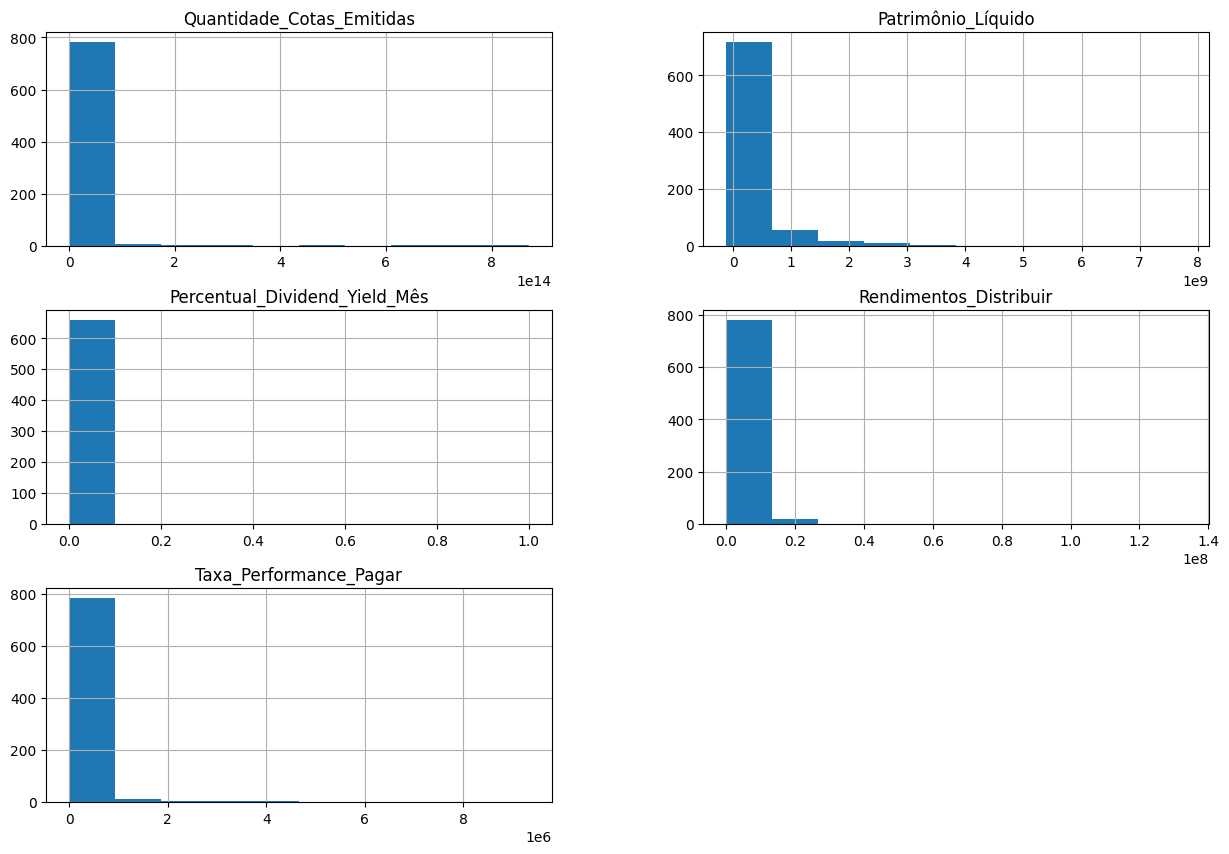

In [122]:
# Histograma
dataset.hist(figsize = (15,10))
plt.show()

O Gráfico de Densidade, ou Density Plot, é bem parecido com o histograma, mas com uma visualização um pouco diferente. Com ele, pode ser mais fácil identificar a distribuição do atributos do dataset. Assim como fizemos com o histograma, vamos criar um density plot para cada atributo do dataset.

Veremos que muitos dos atributos têm uma distribuição distorcida. Uma transformação como a Box-Cox, que pode aproximar a distribuição de uma Normal, pode ser útil neste caso.

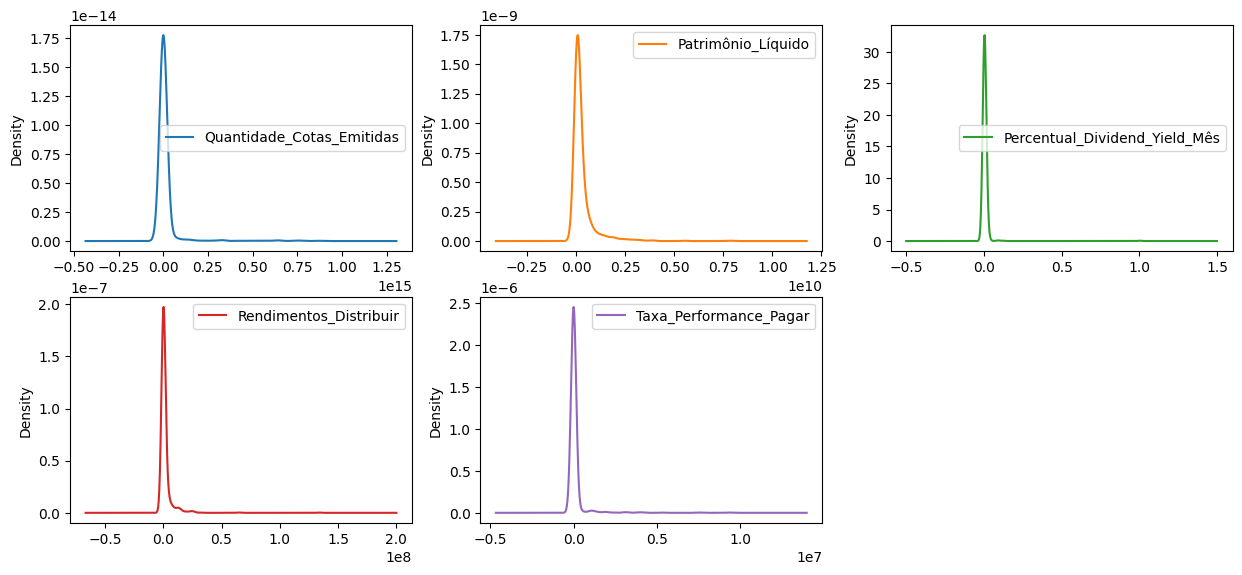

In [123]:
# Density Plot
dataset.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

Vamos agora trabalhar com boxplots. No **boxblot**, a linha no centro (vermelha) representa o valor da mediana (segundo quartil ou p50). A linha abaixo é o 1o quartil (p25) e a linha acima o terceiro quartil (p75). O boxplot ajuda a ter uma ideia da dispersão dos dataset e os possíveis outliers. VERIFICAR

*OBS: Se um ponto do dataset é muito distante da média (acima de 3 desvios padrão da média), pode ser considerado outlier.*

Nos gráficos bloxplot, veremos que a dispersão dos atributos do dataset é bem diferente.

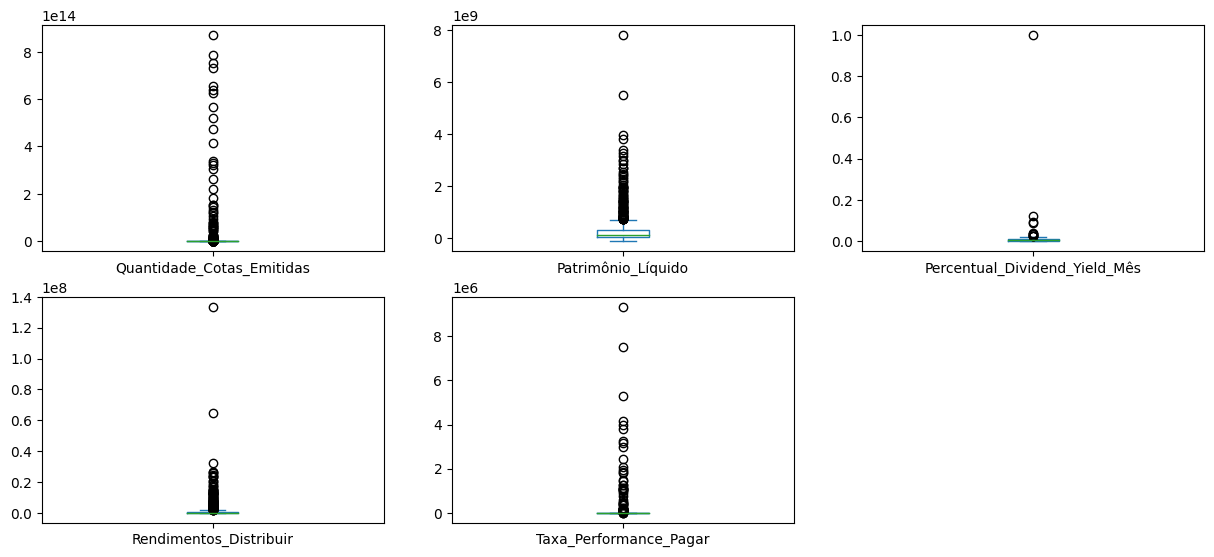

In [125]:
# Bloxplot - no bloxplot, identificamos vários possíveis outliers em todos os atributos numéricos. 
# Porém, vamos focar basicamente no atributo Percentual_Dividend_Yield_Mês.
dataset.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

### 3.3. Visualizações Multimodais

Ao visualizar as correlações entre os atributos através da matriz de correlação, perceberemos que parece haver alguma estrutura na ordem dos atributos. O azul ao redor da diagonal sugere que os atributos que estão próximos um do outro são geralmente mais correlacionados entre si. Os vermelhos também sugerem alguma correlação negativa moderada, a medida que os atributos 

Vamos agora verificar a covariância entre as variáveis numéricas do dataset. A **covariância** representa como duas variáveis numéricas estão relacionadas. Existem várias formas de calcular a correlação entre duas variáveis, como por exemplo, o coeficiente de correlação de Pearson, que pode ser:
* Próximo de -1 : há uma correlação negativa entre as variáveis, 
* Próximo de +1: há uma correlação positiva entre as variáveis. 
* 0: não há correlação entre as variáveis.

<i>OBS: Esta informação é relevante porque alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houver atributos altamente correlacionados. Vale a pena consultar a documentação do algoritmo para verificar se algum tipo de tratamento de dataset é necessário.</i>

Falamos anteriormente da importância da correlação entre os atributos, e agora iremos visualizar esta informação em formato gráfico. A **matriz de correlação** exibe graficamente a correlação entre os atributos numéricos do dataset.estão mais distantes um do outro na ordenação. 

O código a seguir exibe a matriz de correlação.

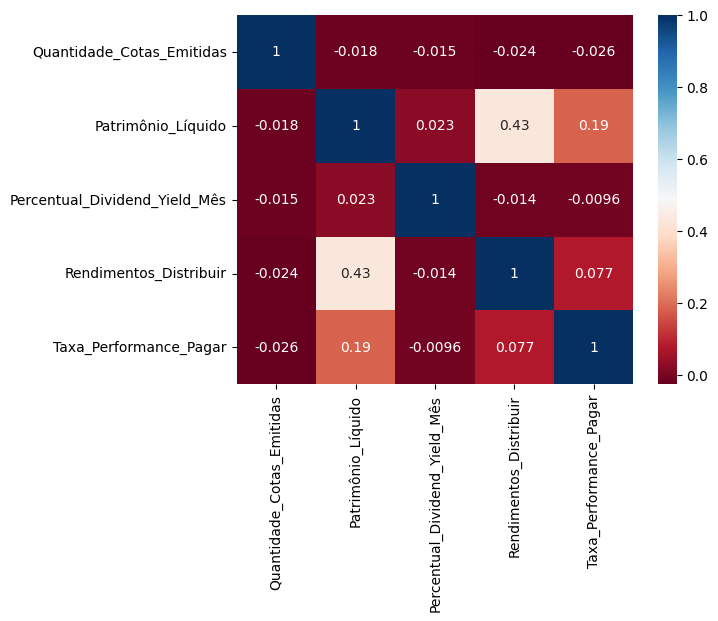

In [126]:
# Matriz de Correlação com Matplotlib Seaborn
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu');

Por sua vez, o gráfico de dispersão (**scatter plot**) mostra o relacionamento entre duas variáveis. Vamos exibir um para cada par de atributos dos dataset, usando o Seaborn.

In [ ]:
# Scatter Plot com Seaborn - Variação 1

sns.pairplot(dataset)

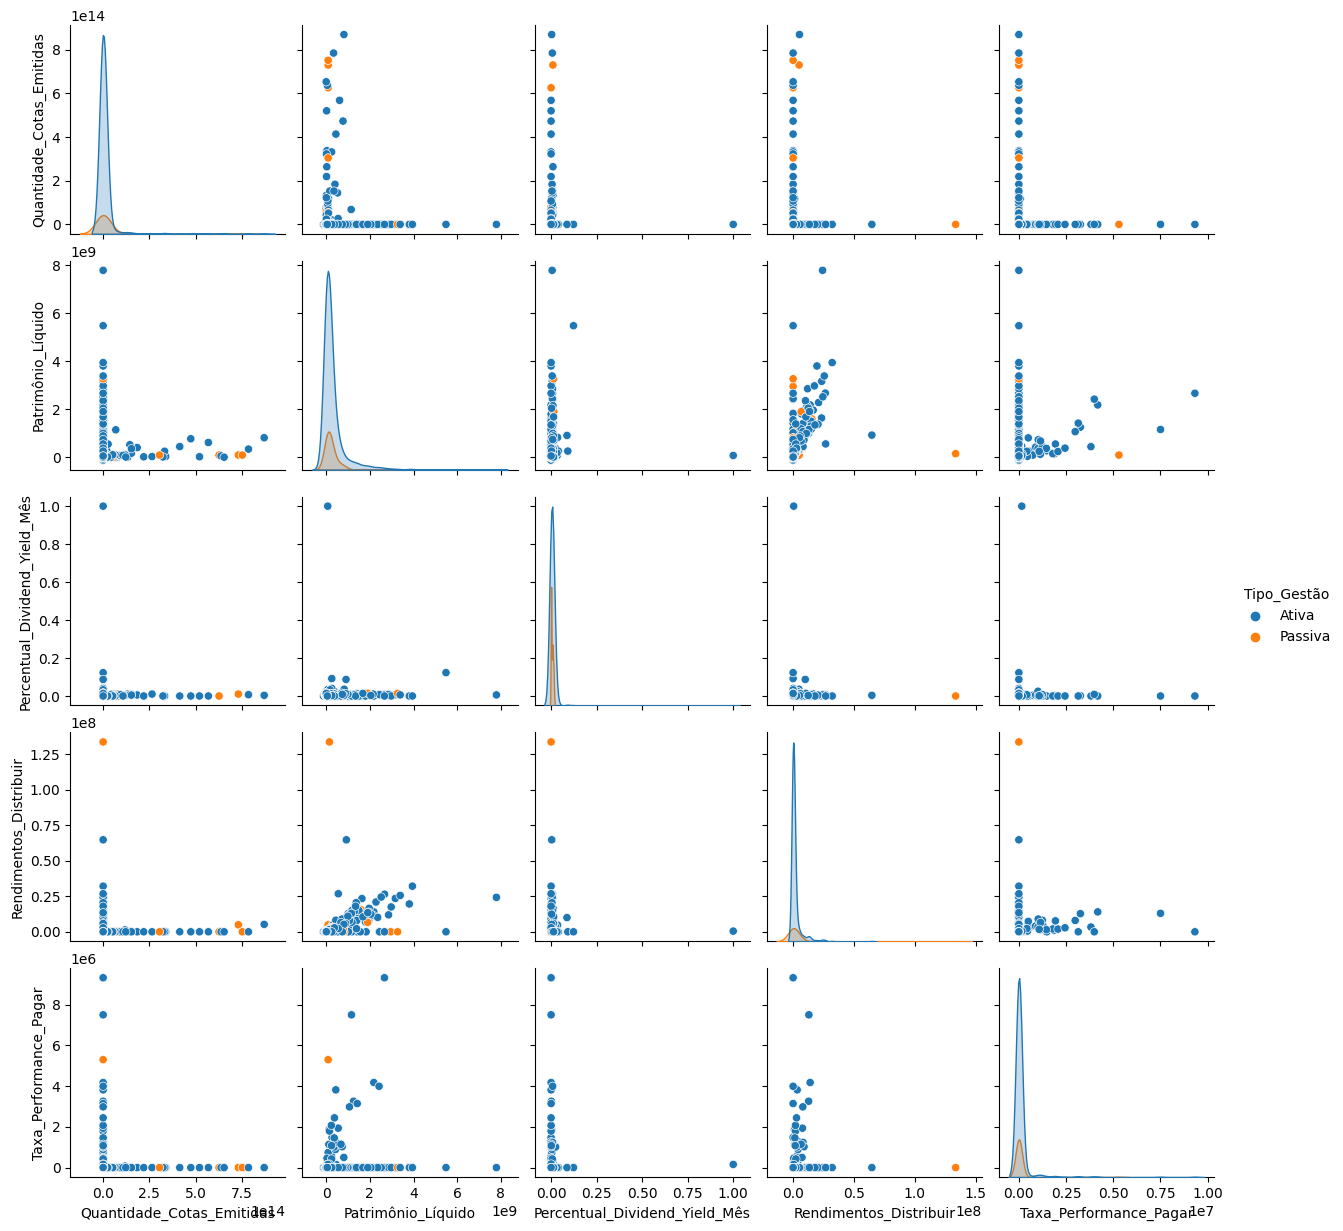

In [127]:
# Scatter Plot com Seaborn - Variação 2

sns.pairplot(dataset, hue = "Tipo_Gestão", height = 2.5);

## 4. Pré-Processamento de dados

Nesta etapa, poderíamos realizar diversas operações de preparação de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados, transformações como one-hot-encoding, seleção de características (feature selection), entre outras não mostradas neste notebook. Lembre-se de não criar uma versão padronizada/normalizada dos dados neste momento (apesar de serem operações de pré-processamento) para evitar o Data Leakage.

### 4.1. Tratamento de Missings e Limpeza

Vamos então fazer os tratamentos e criar uma nova visão do nosso dataset.

In [128]:
# verificando nulls no dataset
dataset.isnull().sum()

Nome_Fundo                         0
Público_Alvo                       0
Código_ISIN                      172
Quantidade_Cotas_Emitidas          0
Segmento_Atuação                  10
Tipo_Gestão                       11
Patrimônio_Líquido                 0
Percentual_Dividend_Yield_Mês    147
Rendimentos_Distribuir             5
Taxa_Performance_Pagar             0
Taxa_Performance                   0
dtype: int64

<Axes: >

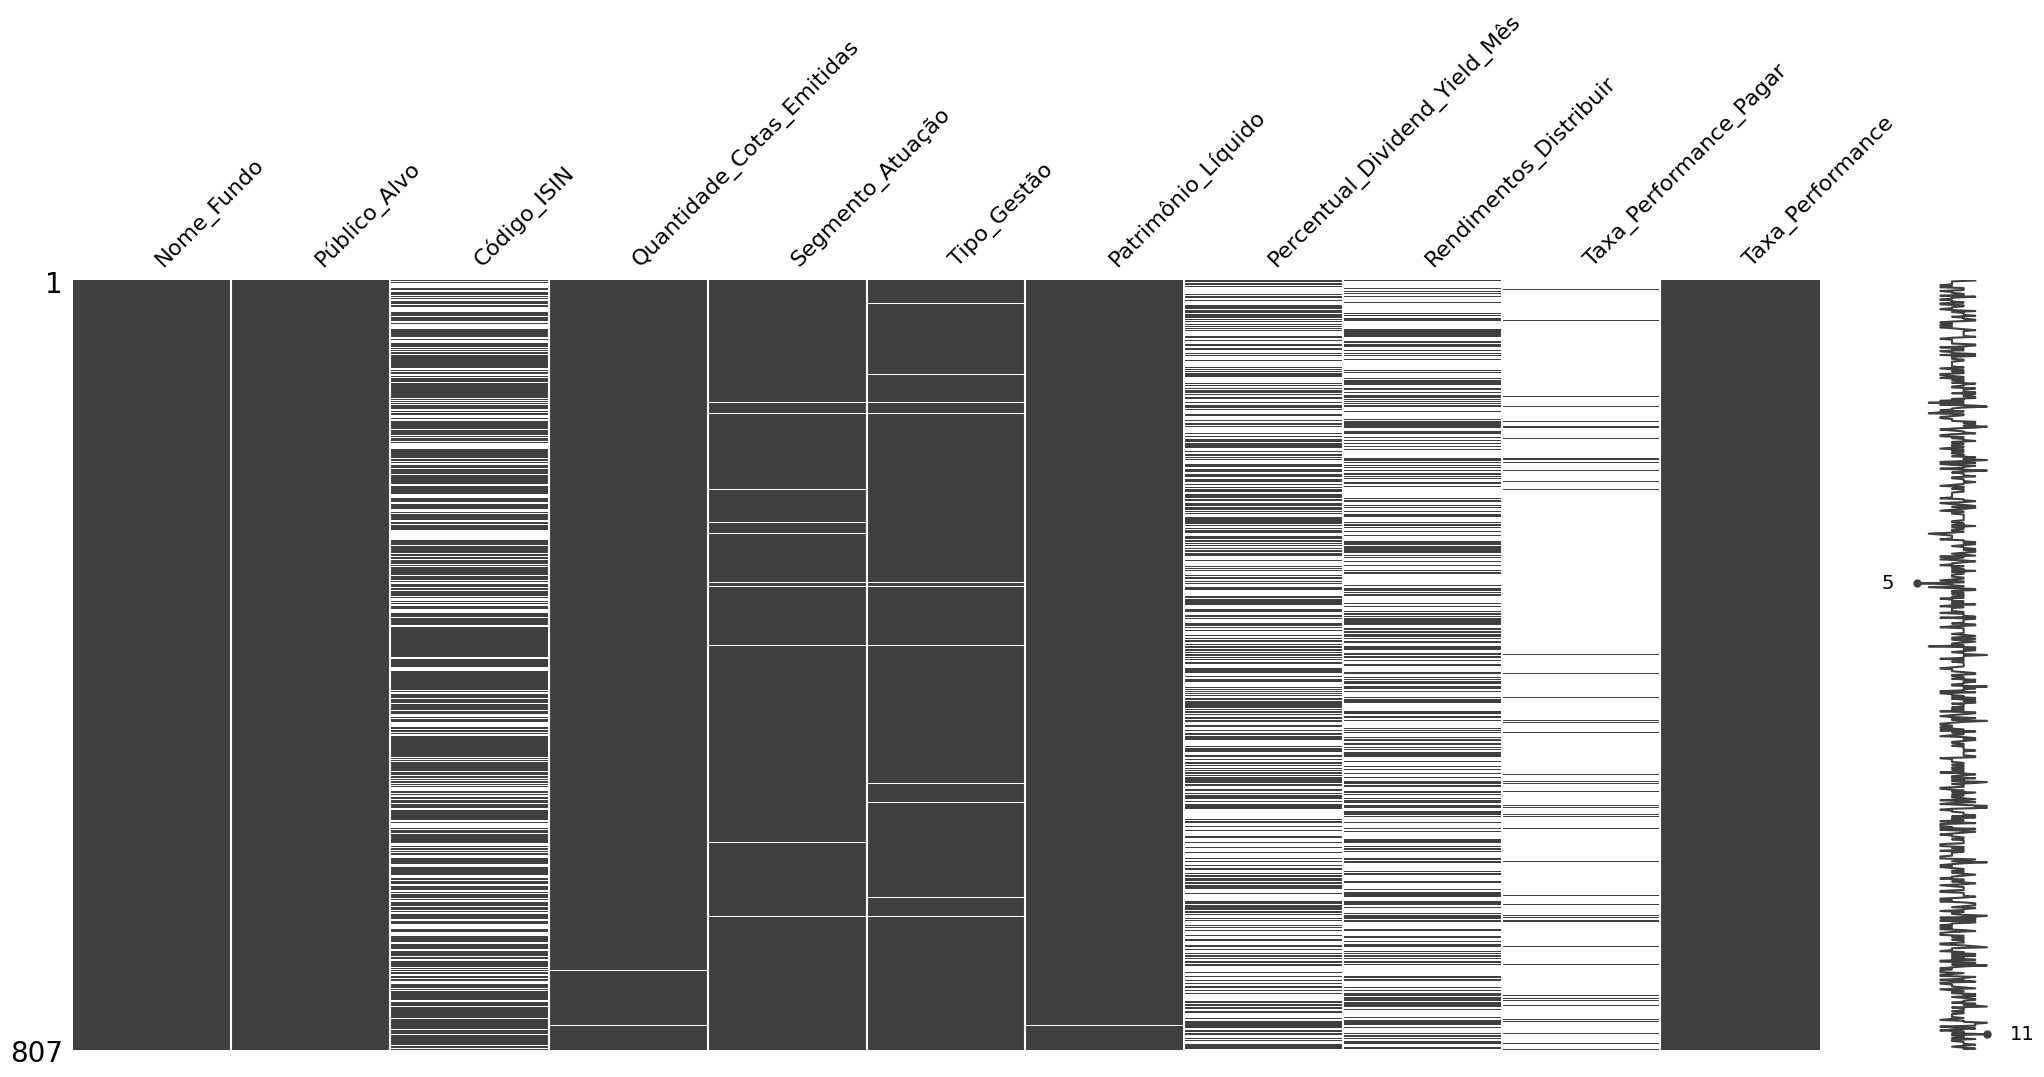

In [129]:
# salvando um NOVO dataset para tratamento de missings (cuidado para não sobrescrever o dataset original!)

# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas com exceção da última (classe)
atributos = dataset[col[:]]

# substituindo os zeros por NaN
atributos.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

<Axes: >

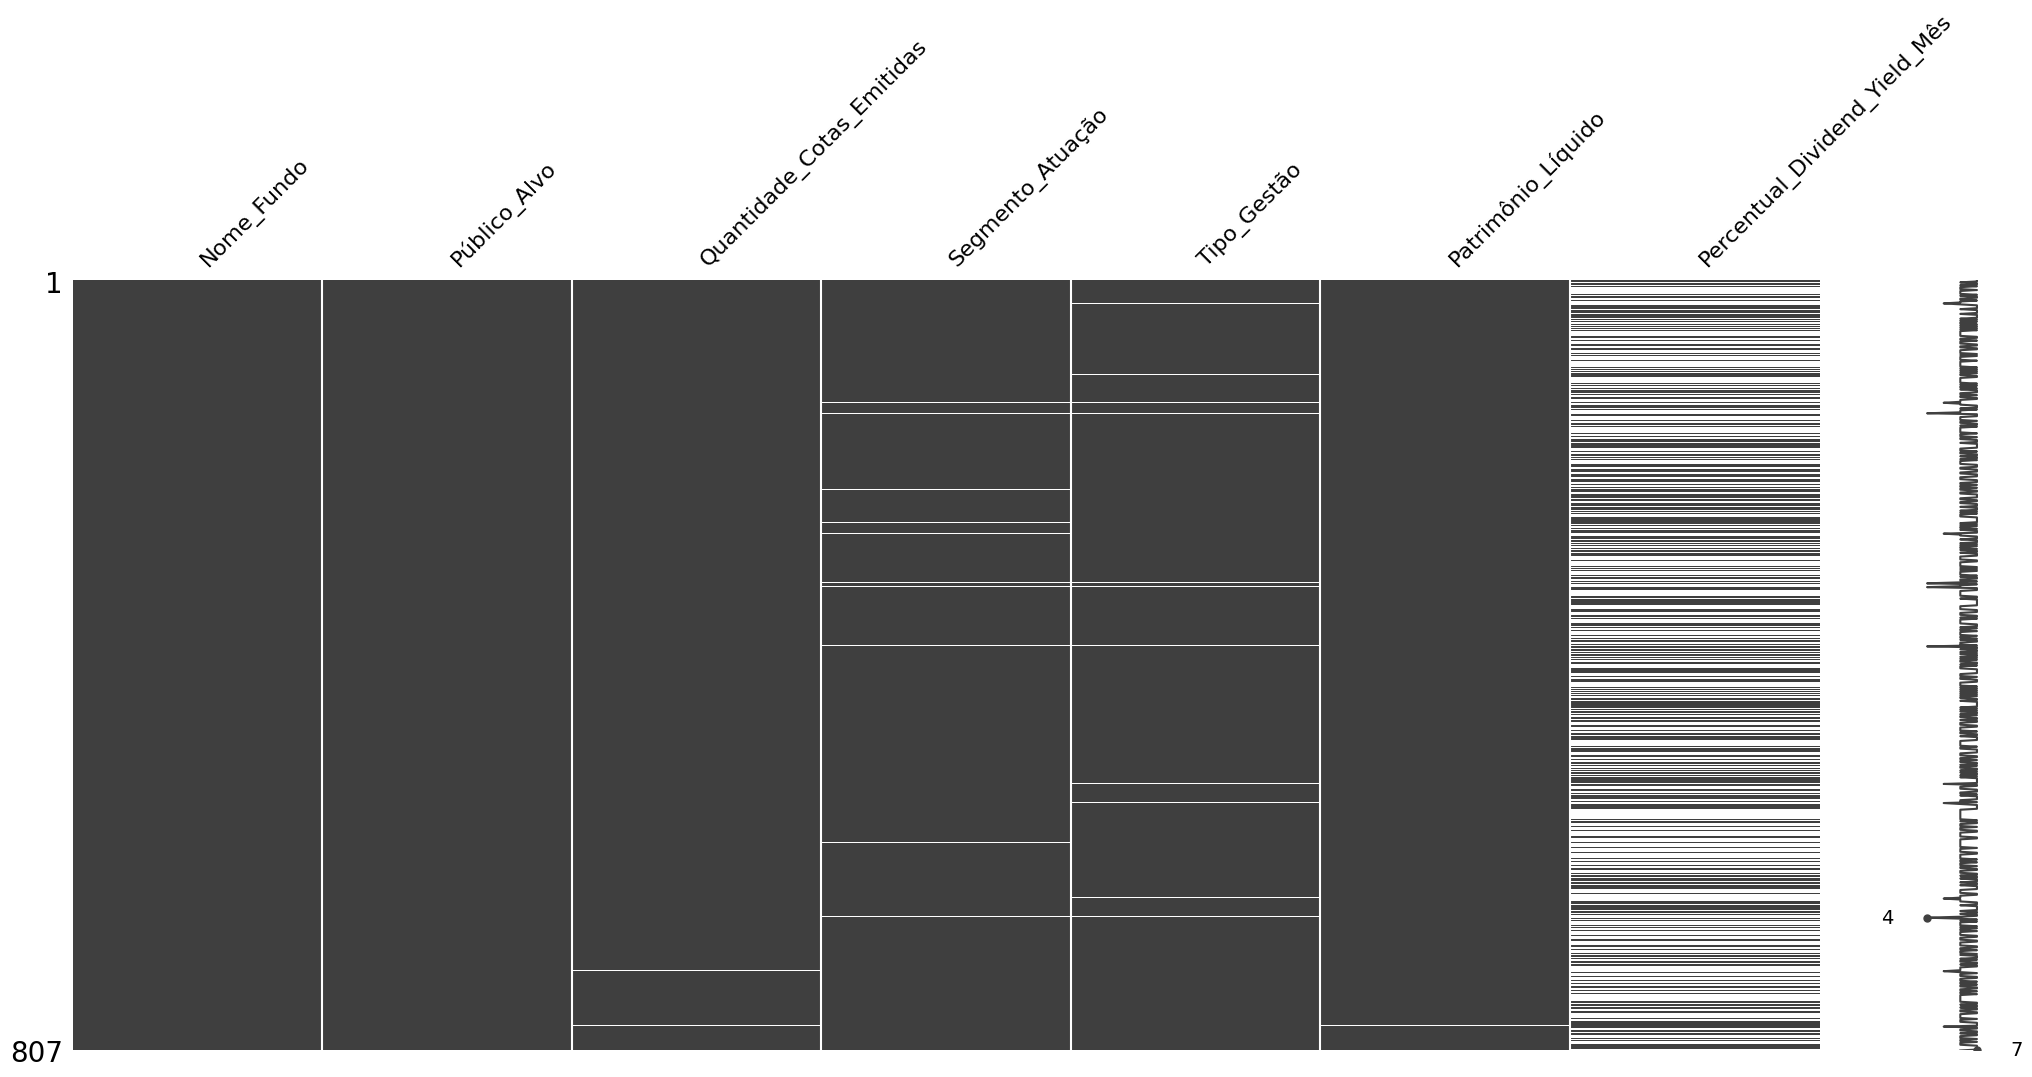

In [130]:
# removendo as colunas 'Código_ISIN', 'Segmento_Atuação', 'Quantidade_Cotas_Emitidas', 'Patrimônio_Líquido', 'Taxa_Performance_Pagar', 'Taxa_Performance':
atributos.drop(['Código_ISIN', 'Rendimentos_Distribuir', 'Taxa_Performance_Pagar', 'Taxa_Performance'], axis=1, inplace= True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

<Axes: >

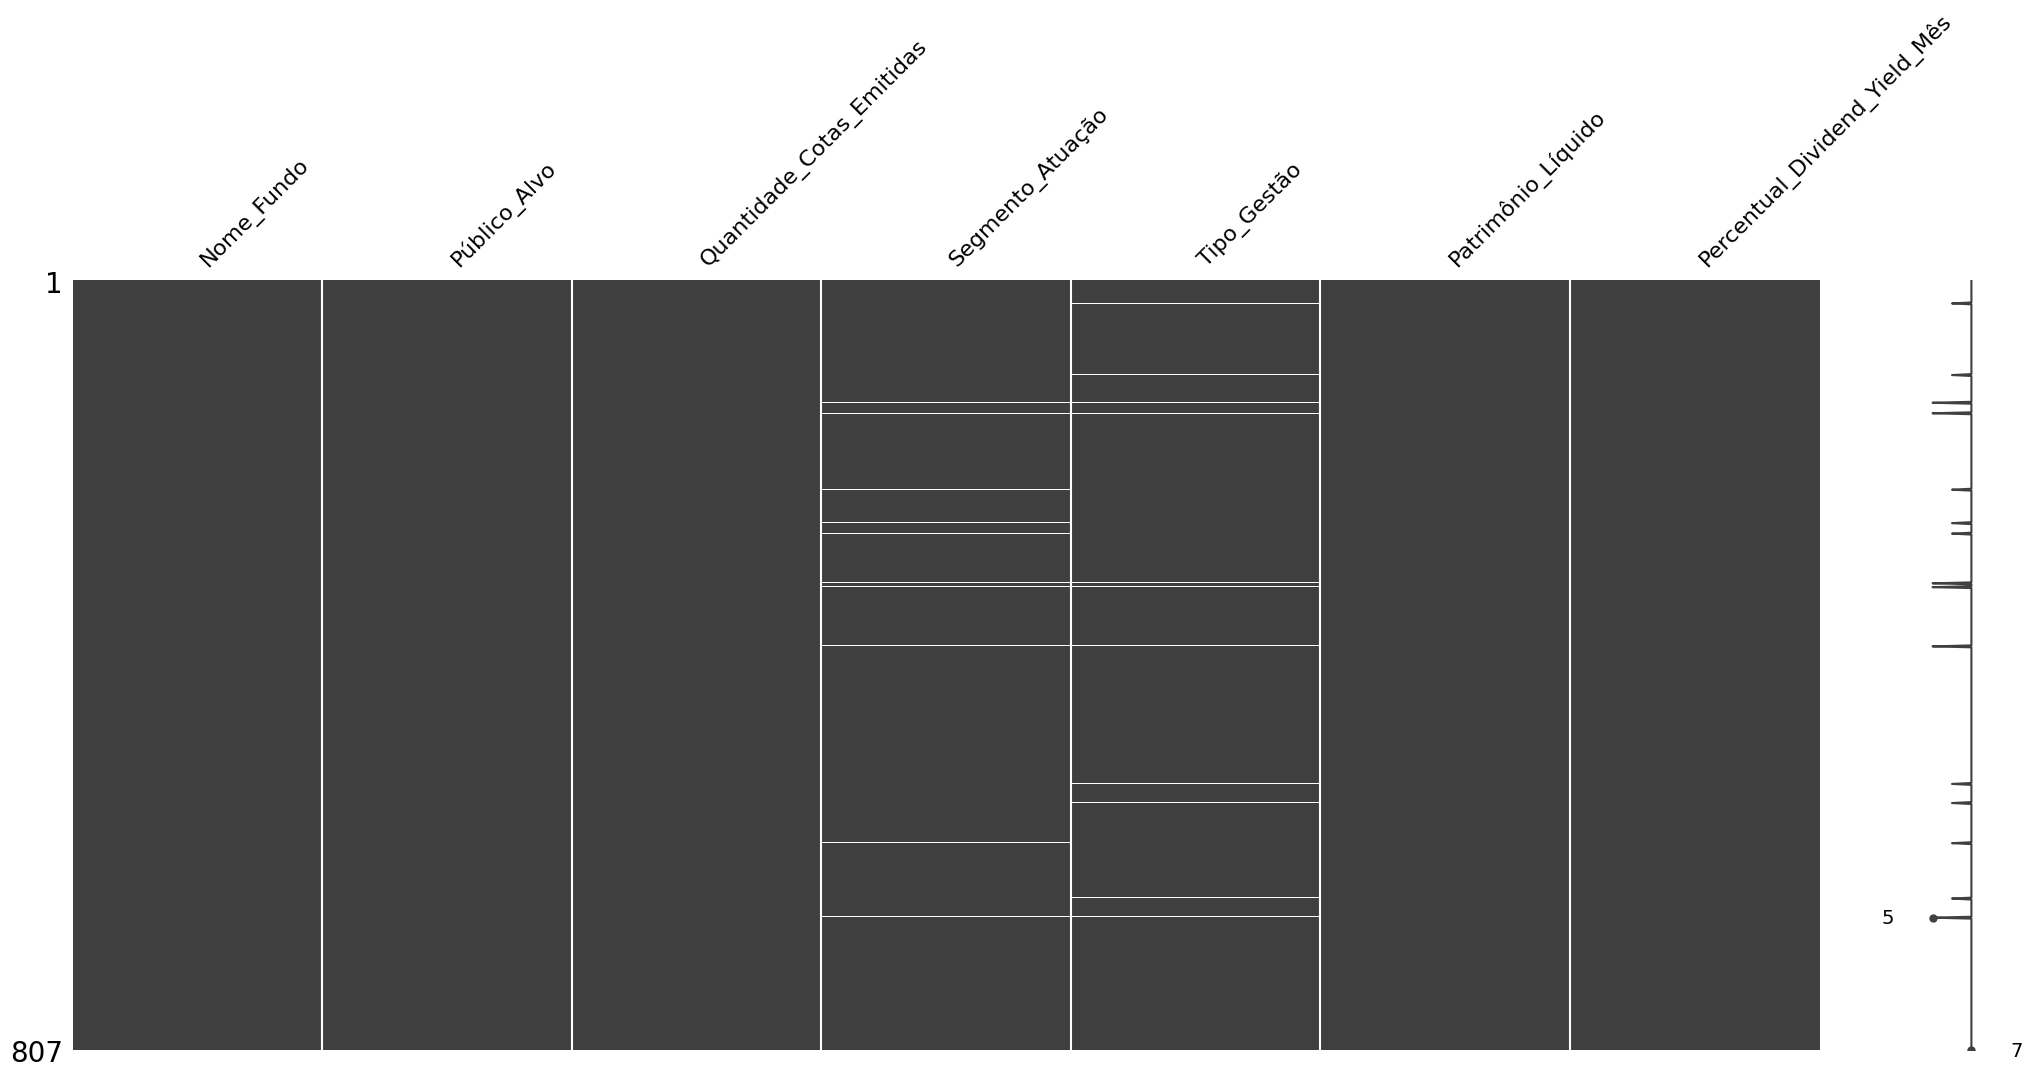

In [131]:
# substituindo os NaN de 'Percentual_Dividend_Yield_Mês', 'Rendimentos_Distribuir' pela mediana da coluna
atributos['Percentual_Dividend_Yield_Mês'].fillna(atributos['Percentual_Dividend_Yield_Mês'].median(), inplace=True)
atributos['Quantidade_Cotas_Emitidas'].fillna(atributos['Quantidade_Cotas_Emitidas'].median(), inplace=True)
atributos['Patrimônio_Líquido'].fillna(atributos['Patrimônio_Líquido'].median(), inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

<Axes: >

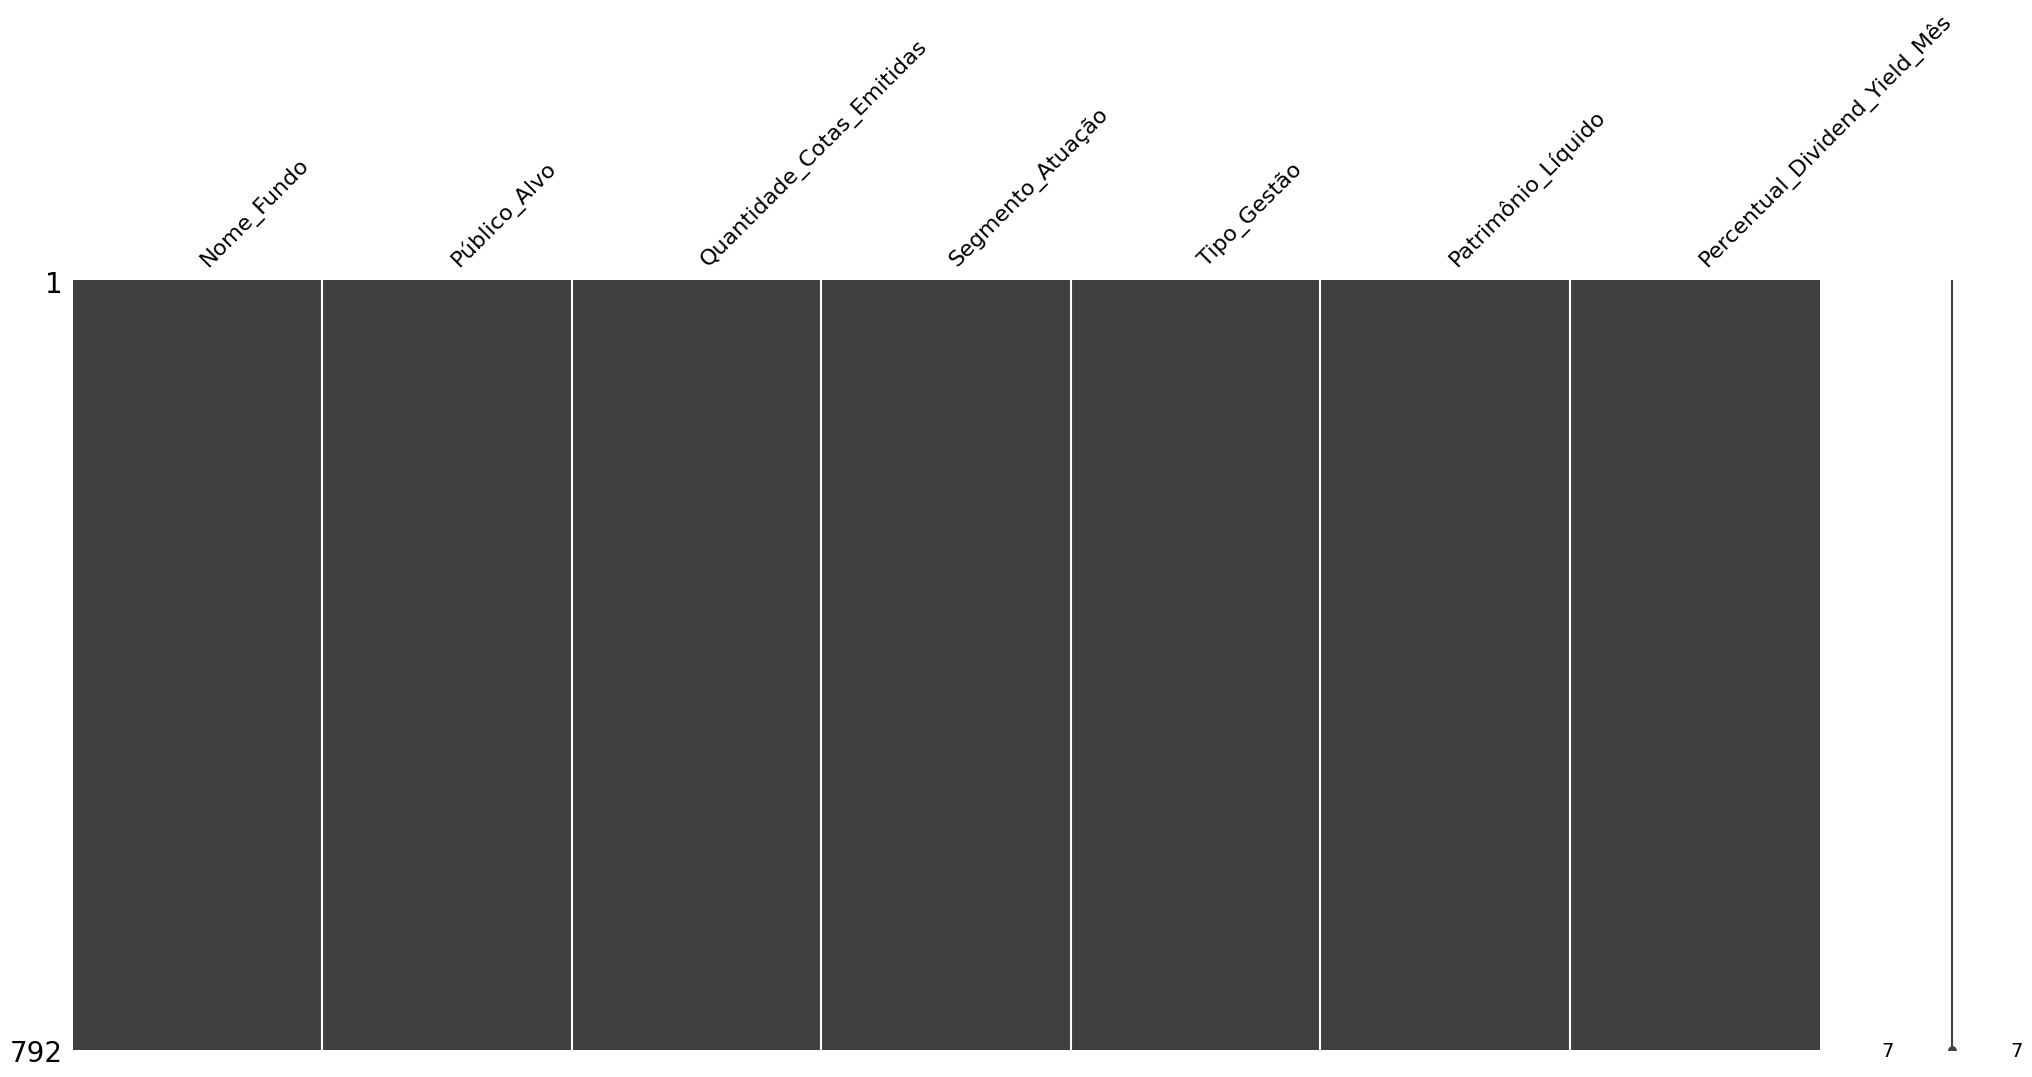

In [133]:
# Verificando e removendo os valores ausentes, se houver:
atributos.isna().sum()
atributos = atributos.dropna()

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

In [134]:
# Guardando o novo dataset para testes futuros
datasetSemMissings = atributos

# exibindo as primeiras linhas
datasetSemMissings.head()

,Nome_Fundo,Público_Alvo,Quantidade_Cotas_Emitidas,Segmento_Atuação,Tipo_Gestão,Patrimônio_Líquido,Percentual_Dividend_Yield_Mês
0,59,INVESTIDORES EM GERAL,"11,588,199.000",Outros,Ativa,"1,248,096,452.770",0.006
1,.,INVESTIDOR QUALIFICADO,"10,000.000",Lajes Corporativas,Ativa,"116,800,571.360",0.002
2,051 AGRO FI NAS CADEIAS PRODUTIVAS AGROINDUSTR...,INVESTIDOR PROFISSIONAL,"1,550,000.000",Outros,Ativa,"154,103,934.300",0.008
3,17007 NAÇÕES FUNDO DE INVESTIMENTO IMOBILIÁRIO,INVESTIDOR PROFISSIONAL,"273,525,267.000",Híbrido,Ativa,"558,759,541.190",0.008
4,2509 FUNDO DE INVESTIMENTO IMOBILIARIO - FII,INVESTIDOR QUALIFICADO,"1,506,194.000",Lajes Corporativas,Passiva,"2,955,385,631.100",0.005


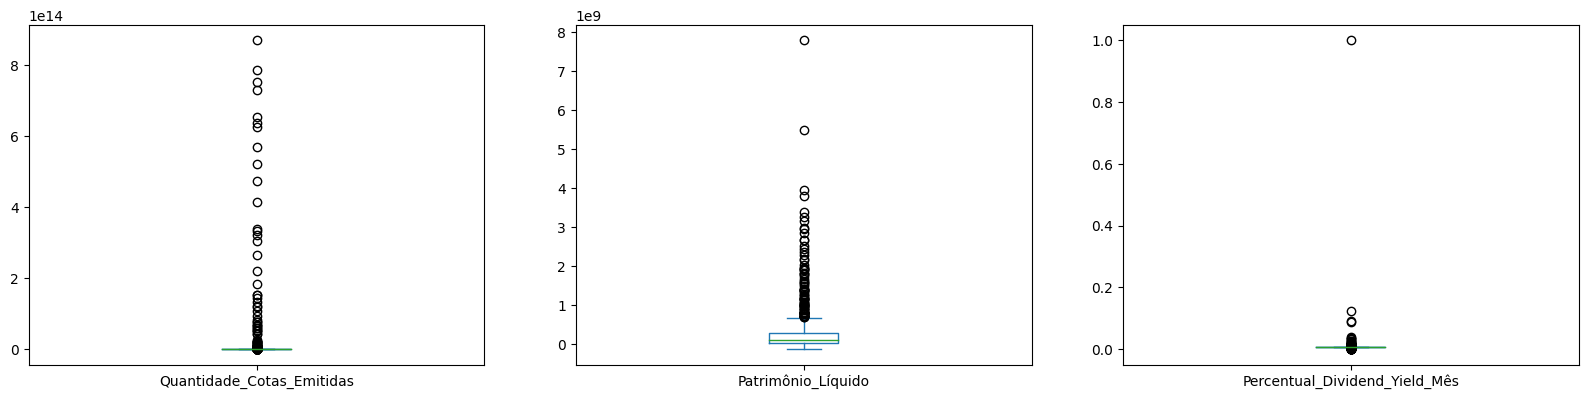

In [147]:
# bloxplot - verificamos que ainda existe um outlier no Percentual_Dividend_Yield_Mês
datasetSemMissings.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (20,15))
plt.show()

Tipo_Gestão
Ativa      [[Axes(0.125,0.666111;0.336957x0.213889), Axes...
Passiva    [[Axes(0.125,0.666111;0.336957x0.213889), Axes...
dtype: object

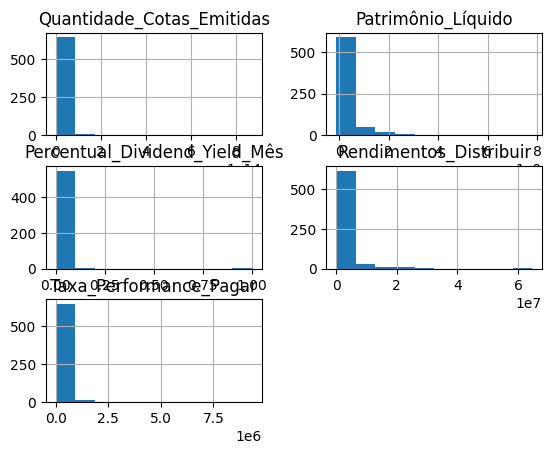

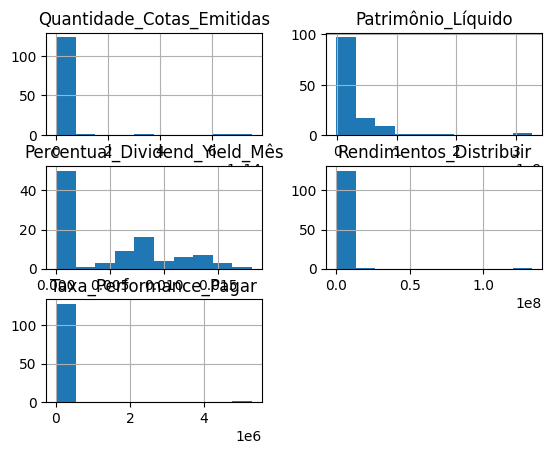

In [149]:
dataset.groupby('Tipo_Gestão').hist()

In [150]:
# Verificando se as colunas restantes estão com todos os missings tratados:
datasetSemMissings.isnull().sum()

Nome_Fundo                       0
Público_Alvo                     0
Quantidade_Cotas_Emitidas        0
Segmento_Atuação                 0
Tipo_Gestão                      0
Patrimônio_Líquido               0
Percentual_Dividend_Yield_Mês    0
dtype: int64

In [151]:
# Fazendo o resumo estatístico dos dados tratados:
datasetSemMissings.describe()

,Quantidade_Cotas_Emitidas,Patrimônio_Líquido,Percentual_Dividend_Yield_Mês
count,792.000,792.000,792.000
mean,"14,137,638,544,754.469","302,521,449.306",0.010
std,"81,808,991,927,820.750","604,863,756.879",0.036
min,10.000,"-120,528,731.200",0.000
25%,"571,182.250","35,975,809.170",0.008
50%,"3,812,055.000","104,102,433.780",0.008
75%,"382,704,351.250","298,718,640.410",0.008
max,"870,155,199,991,487.000","7,792,811,693.250",1.000


In [152]:
atributos.select_dtypes(include='object').describe()

,Nome_Fundo,Público_Alvo,Segmento_Atuação,Tipo_Gestão
count,792,792,792,792
unique,792,4,9,2
top,59,INVESTIDORES EM GERAL,Híbrido,Ativa
freq,1,360,316,665


In [153]:
datasetSemMissings['Percentual_Dividend_Yield_Mês'].std()

0.0358389309107511

In [154]:
datasetSemMissings['Percentual_Dividend_Yield_Mês'].var()

0.0012844289688255903

Como o objetivo inicial do projeto é identificar qual Tipo de Gestão oferece maior retorno, criaremos um subdataset com os atributos Tipo_Gestão e Percentual_Dividend_Yield_Mês. Dessa forma, utilizaremos a mediana para Gestão ATIVA e PASSIVA e teremos a resposta para nossa pergunta.

In [155]:
# Criando um subdataset com base no datasetSemMissings (que já passou por algumas etapas de pré processamento).
# Selecionando as colunas que quero trabalhar:
colselecionadas = ['Tipo_Gestão', 'Percentual_Dividend_Yield_Mês']

# Criando o nome para o novo subtataset:
dataframe_por_Tipo_Gestão = datasetSemMissings.filter(items=colselecionadas)

# Solicitando a visualização:
dataframe_por_Tipo_Gestão.head()

,Tipo_Gestão,Percentual_Dividend_Yield_Mês
0,Ativa,0.006
1,Ativa,0.002
2,Ativa,0.008
3,Ativa,0.008
4,Passiva,0.005


In [156]:
dataframe_por_Tipo_Gestão.groupby('Tipo_Gestão').count()

,Percentual_Dividend_Yield_Mês
Tipo_Gestão,
Ativa,665
Passiva,127


In [157]:
dataframe_por_Tipo_Gestão.groupby('Tipo_Gestão').median()

,Percentual_Dividend_Yield_Mês
Tipo_Gestão,
Ativa,0.008
Passiva,0.008


In [158]:
dataframe_por_Tipo_Gestão.groupby('Tipo_Gestão').mean()

,Percentual_Dividend_Yield_Mês
Tipo_Gestão,
Ativa,0.010
Passiva,0.008


In [159]:
# Verificando o valor máximo para cada classe (Ativa e Passiva):
dataframe_por_Tipo_Gestão.groupby('Tipo_Gestão').max()

,Percentual_Dividend_Yield_Mês
Tipo_Gestão,
Ativa,1.000
Passiva,0.018


In [170]:
# mostrando o resumo estatístico do subset dataframe_por_Tipo_Gestão:
dataframe_por_Tipo_Gestão.groupby('Tipo_Gestão').describe()

Percentual_Dividend_Yield_Mês                                      \
                                    count  mean   std   min   25%   50%   75%   
Tipo_Gestão                                                                     
Ativa                             665.000 0.010 0.039 0.000 0.008 0.008 0.008   
Passiva                           127.000 0.008 0.003 0.000 0.008 0.008 0.008   

                   
              max  
Tipo_Gestão        
Ativa       1.000  
Passiva     0.018

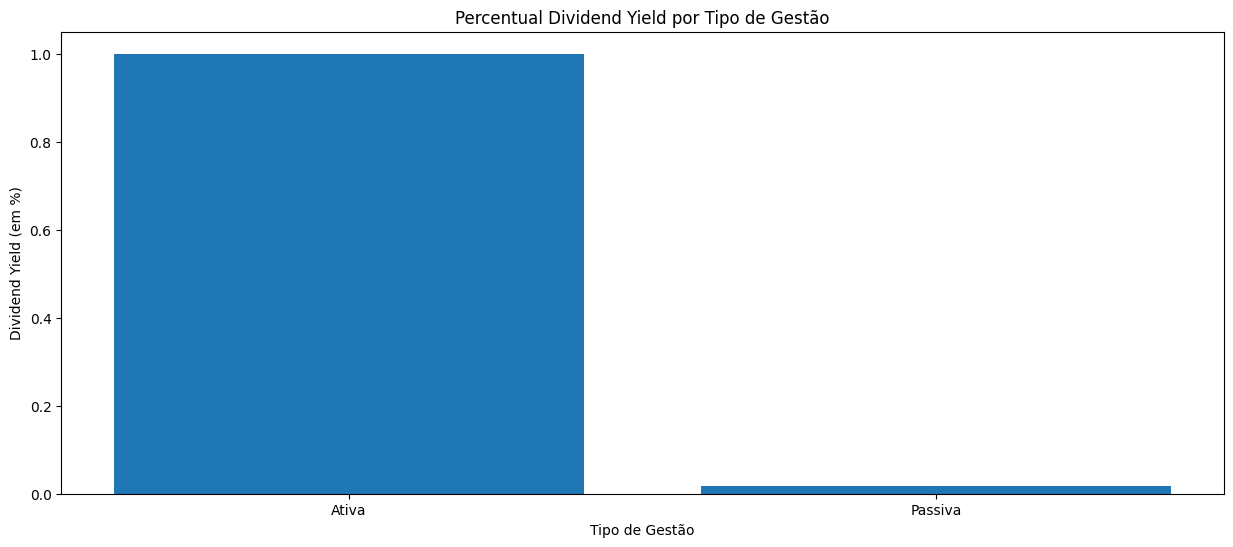

In [166]:
# montando o gráfico:
fig, ax = plt.subplots(figsize = (15, 6))

# montando gráfico
ax.bar(x = datasetSemMissings['Tipo_Gestão'], height = datasetSemMissings['Percentual_Dividend_Yield_Mês'])

# colocando título do gráfico:
plt.title('Percentual Dividend Yield por Tipo de Gestão')

#Definindo os rótulos dos eixos:
plt.xlabel('Tipo de Gestão')
plt.ylabel('Dividend Yield (em %)')

# exibe o gráfico:
plt.show()


Tipo_Gestão
Ativa      [[Axes(0.125,0.11;0.775x0.77)]]
Passiva    [[Axes(0.125,0.11;0.775x0.77)]]
dtype: object

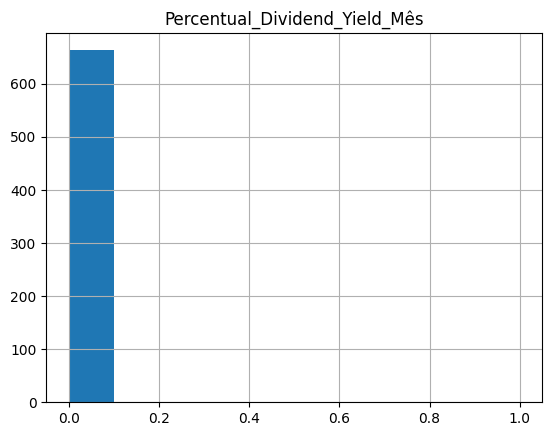

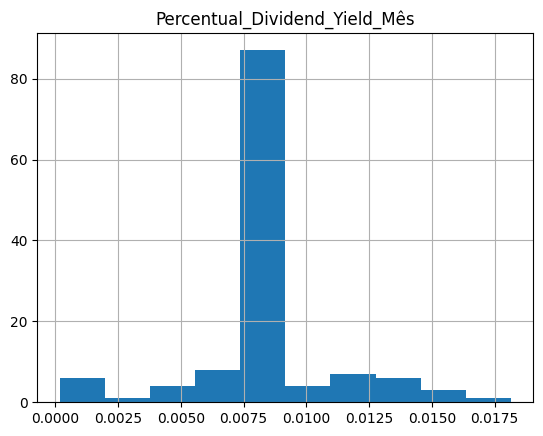

In [168]:
# Analisando o gráfico histograma, verificamos que o primeiro gráfico (Gestão Ativa) tem valores
# majoritariamente entre 0,0000 e 0,1000%, enquanto o segundo gráfico (Gestão Passiva) tem diversos va-
#lores entre 0,0000 e 0,0175%.
dataframe_por_Tipo_Gestão.groupby('Tipo_Gestão').hist()

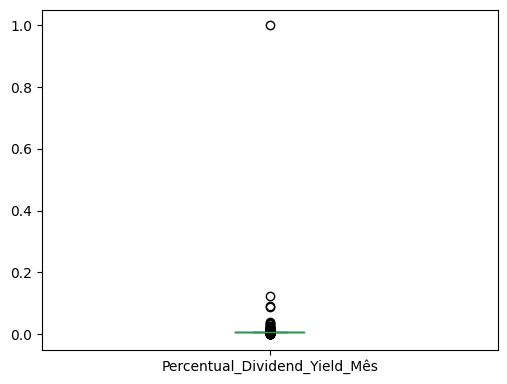

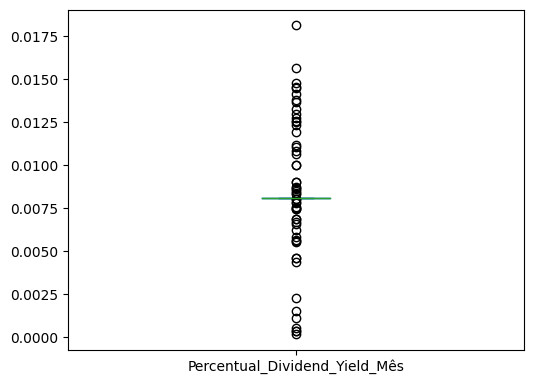

In [171]:
# bloxplot Tipo_Gestão Ativa e Passiva - verificamos que ainda existe um outlier no Percentual_Dividend_Yield_Mês
# no primeiro bloxplot (Gestão Ativa), porém vamos considerá-lo, pois verificamos que de fato tem havido maior dis-
# tribuição nesse ativo.
dataframe_por_Tipo_Gestão.groupby('Tipo_Gestão').plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (20,15))
plt.show()

In [172]:
# one hot encode para os atributos categóricos não ordinais (Tipo_Gestão), e exibindo os dados transformados:
encoded_X = OneHotEncoder(cols=['Tipo_Gestão'])
encoded_X.fit_transform(atributos)

,Nome_Fundo,Público_Alvo,Quantidade_Cotas_Emitidas,Segmento_Atuação,Tipo_Gestão_1,Tipo_Gestão_2,Patrimônio_Líquido,Percentual_Dividend_Yield_Mês
0,59,INVESTIDORES EM GERAL,"11,588,199.000",Outros,1,0,"1,248,096,452.770",0.006
1,.,INVESTIDOR QUALIFICADO,"10,000.000",Lajes Corporativas,1,0,"116,800,571.360",0.002
2,051 AGRO FI NAS CADEIAS PRODUTIVAS AGROINDUSTR...,INVESTIDOR PROFISSIONAL,"1,550,000.000",Outros,1,0,"154,103,934.300",0.008
3,17007 NAÇÕES FUNDO DE INVESTIMENTO IMOBILIÁRIO,INVESTIDOR PROFISSIONAL,"273,525,267.000",Híbrido,1,0,"558,759,541.190",0.008
4,2509 FUNDO DE INVESTIMENTO IMOBILIARIO - FII,INVESTIDOR QUALIFICADO,"1,506,194.000",Lajes Corporativas,0,1,"2,955,385,631.100",0.005
...,...,...,...,...,...,...,...,...
802,YAGO FUNDO DE INVESTIMENTO IMOBILIÁRIO,INVESTIDOR QUALIFICADO,"10,307,418.000",Híbrido,1,0,"-1,852,009.560",0.015
803,YORK - FUNDO DE INVESTIMENTO IMOBILIARIO,INVESTIDOR QUALIFICADO,"1,325,222,862.000",Híbrido,1,0,"259,107,833.990",0.002
804,YUCA FUNDO DE INVESTIMENTO IMOBILIARIO,INVESTIDOR PROFISSIONAL,"492,650.000",Residencial,1,0,"51,015,948.930",0.008
805,ZAGROS MULTI FII,INVESTIDOR QUALIFICADO,"100,000.000",Híbrido,1,0,"10,018,979.530",0.014


In [174]:
datasetSemMissings.describe()

,Quantidade_Cotas_Emitidas,Patrimônio_Líquido,Percentual_Dividend_Yield_Mês
count,792.000,792.000,792.000
mean,"14,137,638,544,754.469","302,521,449.306",0.010
std,"81,808,991,927,820.750","604,863,756.879",0.036
min,10.000,"-120,528,731.200",0.000
25%,"571,182.250","35,975,809.170",0.008
50%,"3,812,055.000","104,102,433.780",0.008
75%,"382,704,351.250","298,718,640.410",0.008
max,"870,155,199,991,487.000","7,792,811,693.250",1.000


** Não utilizaremos o ordinal encoder para os atributos porque não temos dados ordinais.

### 4.2. Normalizando e Padronizando

In [175]:
# separando o array em componentes de input e output
X = datasetSemMissings.values[:,5:6]
y = datasetSemMissings.values[:,6]

In [176]:
# Normalizando os dados
rescaledX = MinMaxScaler().fit_transform(X)

# Exibindo os dados transformados
print("Dados Originais: \n\n", dataset.values)
print("\nDados Normalizados: \n\n", rescaledX)

Dados Originais: 

 [[59 'INVESTIDORES EM GERAL' 'BRRBVACTF006' ... 12502647.9 0.0 'Não']
 ['.' 'INVESTIDOR QUALIFICADO' 0 ... 0.0 0.0 'Não']
 ['051 AGRO FI NAS CADEIAS PRODUTIVAS AGROINDUSTRIAIS - FIAGRO'
  'INVESTIDOR PROFISSIONAL' 'BRFZDACTF008' ... 0.0 0.0 'Não']
 ...
 ['YUCA FUNDO DE INVESTIMENTO IMOBILIARIO' 'INVESTIDOR PROFISSIONAL'
  'BRYUFICTF008' ... 189851.16 0.0 'Não']
 ['ZAGROS MULTI FII' 'INVESTIDOR QUALIFICADO' nan ... 44120.01 0.0 'Não']
 ['ZION CAPITAL FUNDO DE INVESTIMENTO IMOBILIÁRIO - FII'
  'INVESTIDORES EM GERAL' 'BRZIFICTF000' ... nan 4803.02 'Sim']]

Dados Normalizados: 

 [[0.17295164]
 [0.02999104]
 [0.03470502]
 [0.0858409 ]
 [0.38869987]
 [0.02264252]
 [0.01975224]
 [0.01975323]
 [0.05141169]
 [0.02697581]
 [0.02705369]
 [0.01628332]
 [0.02179175]
 [0.0170373 ]
 [0.02362795]
 [0.03935253]
 [0.02350372]
 [0.10890903]
 [0.01564076]
 [0.05643633]
 [0.01607407]
 [0.01524422]
 [0.01526382]
 [0.03277537]
 [0.01979256]
 [0.01611929]
 [0.03356079]
 [0.01691682]
 [0.

In [177]:
# Normalizando os dados
rescaledX = MinMaxScaler().fit_transform(X)

# Exibindo os dados transformados
print("Dados Originais: \n\n", atributos.values)
print("\nDados Normalizados: \n\n", rescaledX)

Dados Originais: 

 [[59 'INVESTIDORES EM GERAL' 11588199.0 ... 'Ativa' 1248096452.77
  0.006033]
 ['.' 'INVESTIDOR QUALIFICADO' 10000.0 ... 'Ativa' 116800571.36 0.002027]
 ['051 AGRO FI NAS CADEIAS PRODUTIVAS AGROINDUSTRIAIS - FIAGRO'
  'INVESTIDOR PROFISSIONAL' 1550000.0 ... 'Ativa' 154103934.3 0.008104]
 ...
 ['YUCA FUNDO DE INVESTIMENTO IMOBILIARIO' 'INVESTIDOR PROFISSIONAL'
  492650.0 ... 'Ativa' 51015948.93 0.008125]
 ['ZAGROS MULTI FII' 'INVESTIDOR QUALIFICADO' 100000.0 ... 'Ativa'
  10018979.53 0.013673]
 ['ZION CAPITAL FUNDO DE INVESTIMENTO IMOBILIÁRIO - FII'
  'INVESTIDORES EM GERAL' 47360.0 ... 'Ativa' 56078891.02 0.008104]]

Dados Normalizados: 

 [[0.17295164]
 [0.02999104]
 [0.03470502]
 [0.0858409 ]
 [0.38869987]
 [0.02264252]
 [0.01975224]
 [0.01975323]
 [0.05141169]
 [0.02697581]
 [0.02705369]
 [0.01628332]
 [0.02179175]
 [0.0170373 ]
 [0.02362795]
 [0.03935253]
 [0.02350372]
 [0.10890903]
 [0.01564076]
 [0.05643633]
 [0.01607407]
 [0.01524422]
 [0.01526382]
 [0.032775

In [178]:
# Normalizando os dados
rescaledX = MinMaxScaler().fit_transform(X)

# Exibindo os dados transformados
print("Dados Originais: \n\n", datasetSemMissings.values)
print("\nDados Normalizados: \n\n", rescaledX)

Dados Originais: 

 [[59 'INVESTIDORES EM GERAL' 11588199.0 ... 'Ativa' 1248096452.77
  0.006033]
 ['.' 'INVESTIDOR QUALIFICADO' 10000.0 ... 'Ativa' 116800571.36 0.002027]
 ['051 AGRO FI NAS CADEIAS PRODUTIVAS AGROINDUSTRIAIS - FIAGRO'
  'INVESTIDOR PROFISSIONAL' 1550000.0 ... 'Ativa' 154103934.3 0.008104]
 ...
 ['YUCA FUNDO DE INVESTIMENTO IMOBILIARIO' 'INVESTIDOR PROFISSIONAL'
  492650.0 ... 'Ativa' 51015948.93 0.008125]
 ['ZAGROS MULTI FII' 'INVESTIDOR QUALIFICADO' 100000.0 ... 'Ativa'
  10018979.53 0.013673]
 ['ZION CAPITAL FUNDO DE INVESTIMENTO IMOBILIÁRIO - FII'
  'INVESTIDORES EM GERAL' 47360.0 ... 'Ativa' 56078891.02 0.008104]]

Dados Normalizados: 

 [[0.17295164]
 [0.02999104]
 [0.03470502]
 [0.0858409 ]
 [0.38869987]
 [0.02264252]
 [0.01975224]
 [0.01975323]
 [0.05141169]
 [0.02697581]
 [0.02705369]
 [0.01628332]
 [0.02179175]
 [0.0170373 ]
 [0.02362795]
 [0.03935253]
 [0.02350372]
 [0.10890903]
 [0.01564076]
 [0.05643633]
 [0.01607407]
 [0.01524422]
 [0.01526382]
 [0.032775

In [179]:
# Padronizando os dados
rescaledX = StandardScaler().fit_transform(X)

# Exibindo os dados transformados
print("Dados Originais: \n\n", dataset.values)
print("\nDados Padronizados: \n\n", rescaledX)

Dados Originais: 

 [[59 'INVESTIDORES EM GERAL' 'BRRBVACTF006' ... 12502647.9 0.0 'Não']
 ['.' 'INVESTIDOR QUALIFICADO' 0 ... 0.0 0.0 'Não']
 ['051 AGRO FI NAS CADEIAS PRODUTIVAS AGROINDUSTRIAIS - FIAGRO'
  'INVESTIDOR PROFISSIONAL' 'BRFZDACTF008' ... 0.0 0.0 'Não']
 ...
 ['YUCA FUNDO DE INVESTIMENTO IMOBILIARIO' 'INVESTIDOR PROFISSIONAL'
  'BRYUFICTF008' ... 189851.16 0.0 'Não']
 ['ZAGROS MULTI FII' 'INVESTIDOR QUALIFICADO' nan ... 44120.01 0.0 'Não']
 ['ZION CAPITAL FUNDO DE INVESTIMENTO IMOBILIÁRIO - FII'
  'INVESTIDORES EM GERAL' 'BRZIFICTF000' ... nan 4803.02 'Sim']]

Dados Padronizados: 

 [[ 1.56427379e+00]
 [-3.07239829e-01]
 [-2.45528518e-01]
 [ 4.23897132e-01]
 [ 4.38865865e+00]
 [-4.03440164e-01]
 [-4.41277141e-01]
 [-4.41264115e-01]
 [-2.68196232e-02]
 [-3.46712505e-01]
 [-3.45692963e-01]
 [-4.86689137e-01]
 [-4.14577639e-01]
 [-4.76818693e-01]
 [-3.90539700e-01]
 [-1.84687415e-01]
 [-3.92166085e-01]
 [ 7.25884711e-01]
 [-4.95100986e-01]
 [ 3.89584599e-02]
 [-4.89428502e-0

In [180]:
# Padronizando os dados
rescaledX = StandardScaler().fit_transform(X)

# Exibindo os dados transformados
print("Dados Originais: \n\n", atributos.values)
print("\nDados Padronizados: \n\n", rescaledX)

Dados Originais: 

 [[59 'INVESTIDORES EM GERAL' 11588199.0 ... 'Ativa' 1248096452.77
  0.006033]
 ['.' 'INVESTIDOR QUALIFICADO' 10000.0 ... 'Ativa' 116800571.36 0.002027]
 ['051 AGRO FI NAS CADEIAS PRODUTIVAS AGROINDUSTRIAIS - FIAGRO'
  'INVESTIDOR PROFISSIONAL' 1550000.0 ... 'Ativa' 154103934.3 0.008104]
 ...
 ['YUCA FUNDO DE INVESTIMENTO IMOBILIARIO' 'INVESTIDOR PROFISSIONAL'
  492650.0 ... 'Ativa' 51015948.93 0.008125]
 ['ZAGROS MULTI FII' 'INVESTIDOR QUALIFICADO' 100000.0 ... 'Ativa'
  10018979.53 0.013673]
 ['ZION CAPITAL FUNDO DE INVESTIMENTO IMOBILIÁRIO - FII'
  'INVESTIDORES EM GERAL' 47360.0 ... 'Ativa' 56078891.02 0.008104]]

Dados Padronizados: 

 [[ 1.56427379e+00]
 [-3.07239829e-01]
 [-2.45528518e-01]
 [ 4.23897132e-01]
 [ 4.38865865e+00]
 [-4.03440164e-01]
 [-4.41277141e-01]
 [-4.41264115e-01]
 [-2.68196232e-02]
 [-3.46712505e-01]
 [-3.45692963e-01]
 [-4.86689137e-01]
 [-4.14577639e-01]
 [-4.76818693e-01]
 [-3.90539700e-01]
 [-1.84687415e-01]
 [-3.92166085e-01]
 [ 7.2588

In [181]:
# Padronizando os dados
rescaledX = StandardScaler().fit_transform(X)

# Exibindo os dados transformados
print("Dados Originais: \n\n", datasetSemMissings.values)
print("\nDados Padronizados: \n\n", rescaledX)

Dados Originais: 

 [[59 'INVESTIDORES EM GERAL' 11588199.0 ... 'Ativa' 1248096452.77
  0.006033]
 ['.' 'INVESTIDOR QUALIFICADO' 10000.0 ... 'Ativa' 116800571.36 0.002027]
 ['051 AGRO FI NAS CADEIAS PRODUTIVAS AGROINDUSTRIAIS - FIAGRO'
  'INVESTIDOR PROFISSIONAL' 1550000.0 ... 'Ativa' 154103934.3 0.008104]
 ...
 ['YUCA FUNDO DE INVESTIMENTO IMOBILIARIO' 'INVESTIDOR PROFISSIONAL'
  492650.0 ... 'Ativa' 51015948.93 0.008125]
 ['ZAGROS MULTI FII' 'INVESTIDOR QUALIFICADO' 100000.0 ... 'Ativa'
  10018979.53 0.013673]
 ['ZION CAPITAL FUNDO DE INVESTIMENTO IMOBILIÁRIO - FII'
  'INVESTIDORES EM GERAL' 47360.0 ... 'Ativa' 56078891.02 0.008104]]

Dados Padronizados: 

 [[ 1.56427379e+00]
 [-3.07239829e-01]
 [-2.45528518e-01]
 [ 4.23897132e-01]
 [ 4.38865865e+00]
 [-4.03440164e-01]
 [-4.41277141e-01]
 [-4.41264115e-01]
 [-2.68196232e-02]
 [-3.46712505e-01]
 [-3.45692963e-01]
 [-4.86689137e-01]
 [-4.14577639e-01]
 [-4.76818693e-01]
 [-3.90539700e-01]
 [-1.84687415e-01]
 [-3.92166085e-01]
 [ 7.2588

### 4.2. Separação em conjunto de treino e conjunto de teste

É uma boa prática usar um conjunto de teste (na literatura também chamado de conjunto de validação), uma amostra dos dados que não será usada para a construção do modelo, mas somente no fim do projeto para confirmar a precisão do modelo final. É um teste que podemos usar para verificar o quão boa foi a construção do modelo, e para nos dar uma ideia de como o modelo irá performar nas estimativas em dados não vistos. Usaremos 80% do conjunto de dados para modelagem e guardaremos 20% para teste, usando a estratégia train-test-split, já explicada anteriormente. Primeiramente, iremos sinalizar quais são as colunas de atributos (X - 0 a 6) e qual é a coluna das classes (Y - 5). Em seguida, especificaremos o tamanho do conjunto de teste desejado e uma semente (para garantir a reprodutibilidade dos resultados). Finalmente, faremos a separação dos conjuntos de treino e teste através do comando train_test_split, que retornará 4 estruturas de dados: os atributos e classes para o conjunto de teste e os atributos e classes para o conjunto de treino.


In [182]:
test_size = 0.20
seed = 5

# Separação em conjuntos de treino e teste (dataset original)
array = dataset.values
X = array[:,0:10]
y = array[:,10]
#X_train, X_test, y_train, y_test = train_test_split(X, y,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # com estratificação

In [183]:
# Separação em conjuntos de treino e teste (dataset sem missings)
array = dataset.values
X_sm = array[:,0:10]
y_sm = array[:,10]
#X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y_sm) # com estratificação

Sendo assim, conseguimos chegar ao objetivo do MVP: responder qual Tipo de Gestão oferece maior Dividend Yield para o cotista. Ao extrair a média do Tipo de Gestão por Dividend Yeld, vimos que o tipo de Gestao Ativa oferece maior retorno. Isso pode ser visto de forma mais clara no último gráfico que plotamos.